In [ ]:
!pip install jovian --upgrade --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 936.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# **Driver Alertness Detection**


---


Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.

## **Problem Statement:**

---


The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.

# Modeling Objective

In this project, we are supposed to design a classifier that has the ability to potentially detect the alertness of a driver given a set of features.

In [ ]:
import jovian

Importing jovian and opendata sets library

In [ ]:
!pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od
data_set_url = 'https://www.kaggle.com/c/stayalert/data'
od.download(data_set_url)


100%|██████████| 18.2M/18.2M [00:00<00:00, 24.7MB/s]



Extracting archive ./stayalert/stayalert.zip to ./stayalert


In [ ]:
import os
os.chdir("/content/stayalert")

In [ ]:
!pip install pandas numpy matplotlib seaborn sklearn --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
os.listdir()

['fordTrain.csv', 'example_submission.csv', 'Solution.csv', 'fordTest.csv']

In [ ]:
training_data=pd.read_csv("fordTrain.csv")
test_data=pd.read_csv("fordTest.csv")

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:

training_data.shape[0]



604329

In [ ]:
training_data.shape[1]

33

In [ ]:
# this data set qualifes the project requuirements, it has atleast 50000 rows and more than 5 columns.
#lets take a look at the data

# **Exploratory Data Analysis**
I would be using Pandas, Matplotlib and Seaborn for EDA aspects of this project

In [ ]:
training_data.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
#now we will clean the data set.
#trailid columns and obs nums columns are useless and shall be dropped 

In [ ]:
data=training_data

In [ ]:
data.drop(["TrialID", "ObsNum"], axis=1, inplace=True)


In [ ]:
data


,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [ ]:
data.isna().sum()
#data has no null values



IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

# **Univariate & Bivariate Analysis**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)})

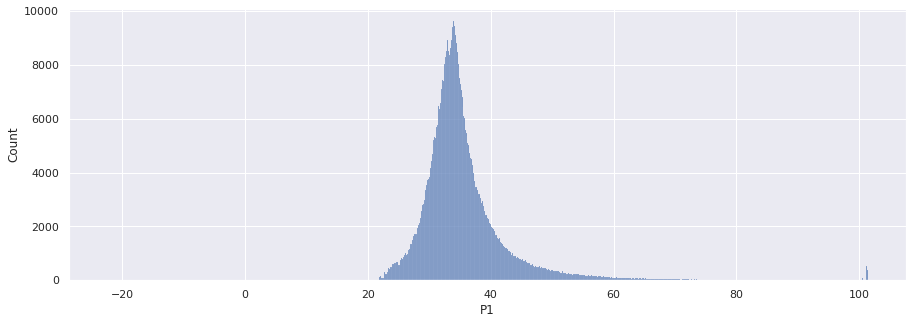

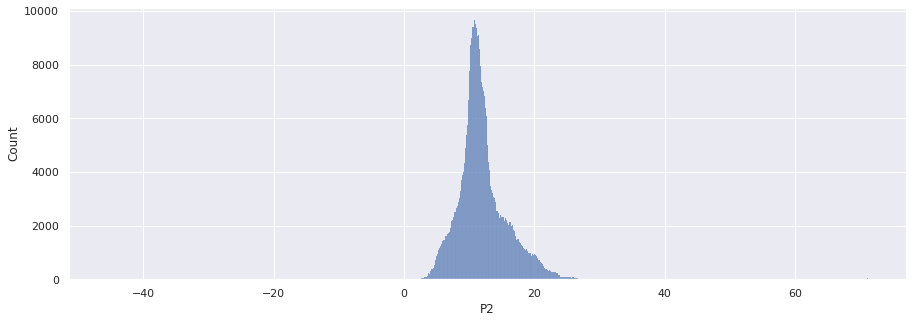

In [ ]:
sns.histplot(data["P1"])
plt.show()
sns.histplot(data["P2"])
plt.show()


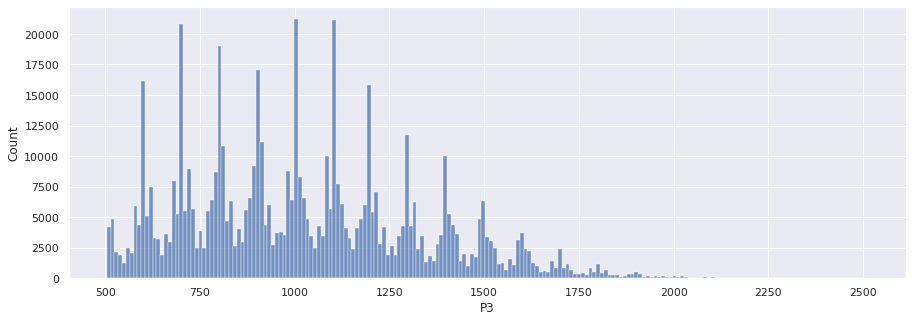

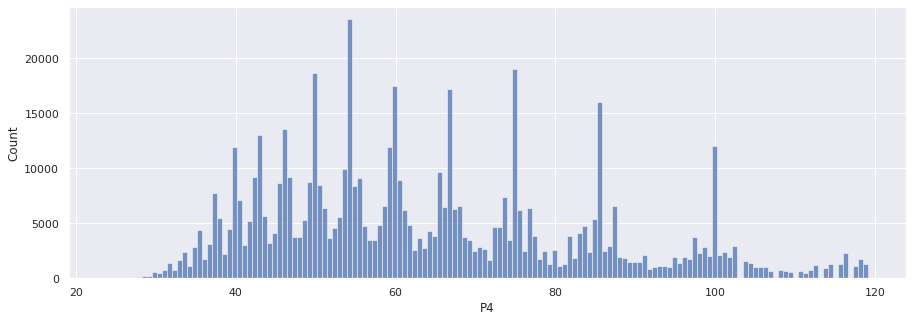

In [ ]:
sns.histplot(data["P3"])
plt.show()
sns.histplot(data["P4"])
plt.show()

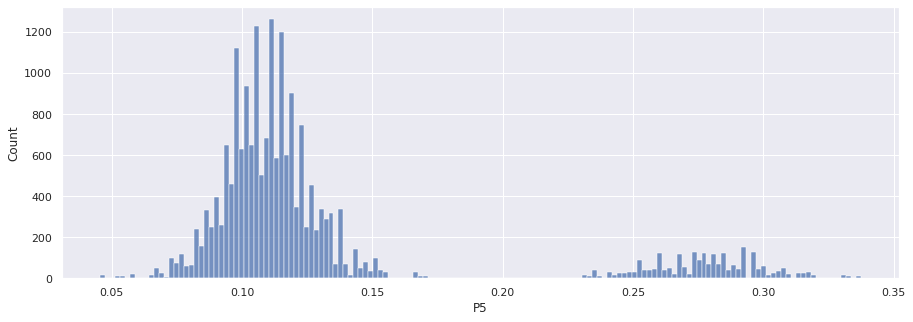

In [ ]:
sns.histplot(data["P5"].head(20_000))
plt.show()

In [ ]:
# I shall drop the data-points that are above the value 0.15

ftr = data["P5"] < 0.20
data = data[ftr]
data.head()

,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,0,17.807,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,0,17.807,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,0,17.807,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,0,17.807,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,0,17.807,...,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144


(459940, 31)


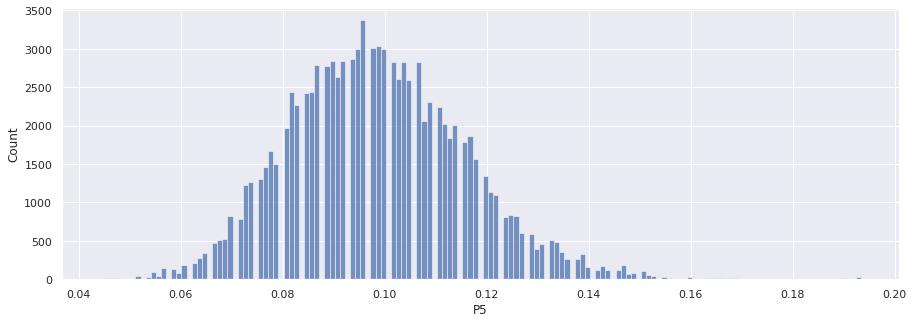

In [ ]:
print(data.shape)
sns.histplot(data["P5"].head(100_000))
plt.show()

0    459940
Name: P8, dtype: int64


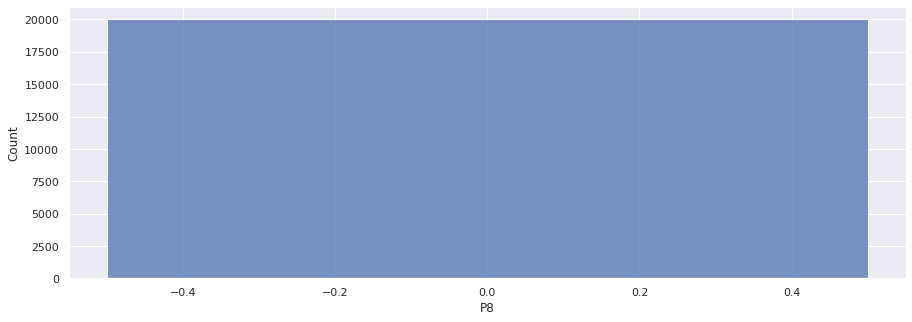

In [ ]:
# This plot show's that the value of P8 is always zero. Therefore, will drop it
print(data["P8"].value_counts())
sns.histplot(data["P8"].head(20_000))
plt.show()

In [ ]:
data = data.drop("P8", axis=1)


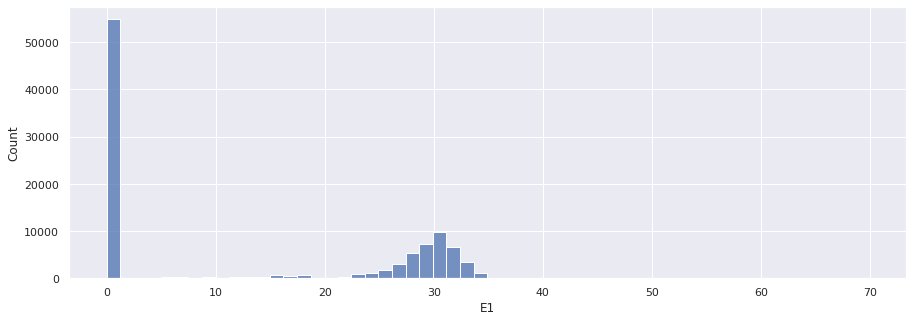

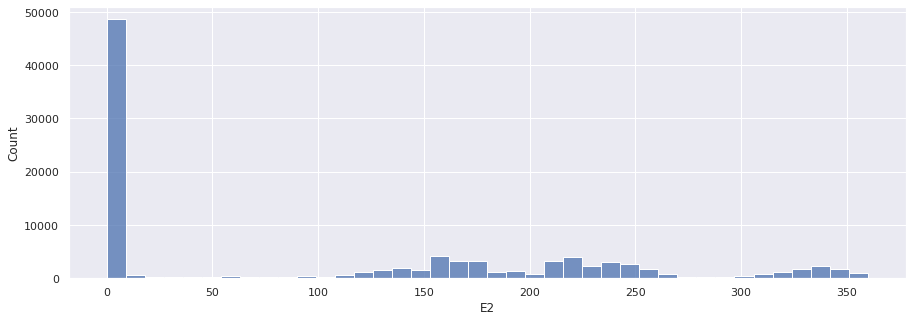

In [ ]:
sns.histplot(data["E1"].head(100_000))
plt.show()
sns.histplot(data["E2"].head(100_000))
plt.show()

Value counts for E3 are: 
 0    458268
1      1371
4       301
Name: E3, dtype: int64


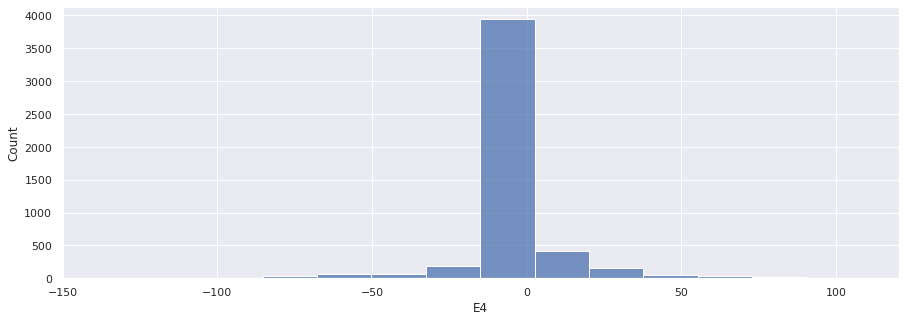

In [ ]:
print("Value counts for E3 are: \n", data["E3"].value_counts())
sns.histplot(data["E4"].head(5000))
plt.show()


# We can see, that there are outliers before and after -100 and 100 respectively. Therefore, I shall drop them

In [ ]:
print("Values of E4 that are less than -100")
data[data["E4"] < -100]

Values of E4 that are less than -100


,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
2237,1,37.9968,19.51430,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.385,767,0.0000,0,1812,0,0.0,0,4,16.3235
2238,1,38.2023,8.02324,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.385,767,0.0000,0,1812,0,0.0,0,4,16.3350
2239,1,38.3385,15.28020,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.280,1023,0.0000,0,1813,0,0.0,0,4,16.3348
2240,1,38.4348,10.24090,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.280,1023,0.0000,0,1813,0,0.0,0,4,16.3658
2732,0,37.7374,9.16250,1524,39.3701,0.108975,664,90.3614,18.516,209.480,...,0.000,752,10.5000,0,2161,0,29.9,0,1,16.6843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603651,1,40.0090,10.30960,680,88.2353,0.120651,600,100.0000,23.841,341.441,...,-2.135,1023,28.4812,1,1306,0,0.0,0,4,17.0335
603652,1,40.1742,17.54930,1428,42.0168,0.101191,604,99.3377,23.841,341.441,...,-2.135,767,28.4812,1,1287,0,0.0,0,4,17.0741
603653,1,40.3089,9.76309,1428,42.0168,0.101191,604,99.3377,23.841,341.441,...,-2.135,767,28.4812,1,1287,0,0.0,0,4,17.0846
603654,1,40.4124,15.31680,1428,42.0168,0.101191,604,99.3377,23.841,341.441,...,-2.415,255,28.4812,1,1276,0,0.0,0,4,17.0867


In [ ]:
fltr = data["E4"] < -100
data = data.drop(data[fltr].index, axis=0)
fltr = data["E4"] > 100
data = data.drop(data[fltr].index, axis=0)
data

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,17.807,222.11,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,17.807,222.11,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


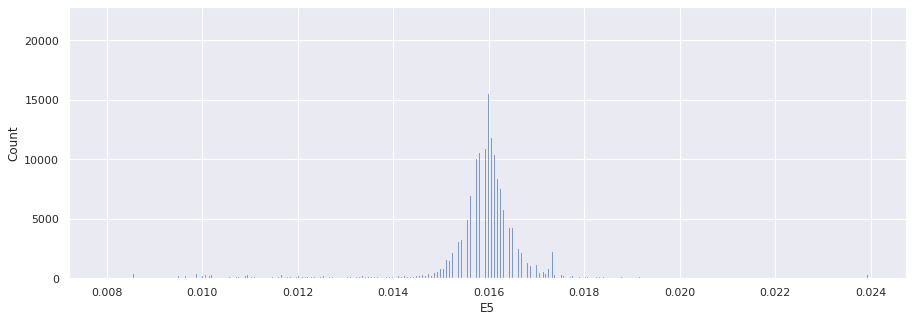

In [ ]:
sns.histplot(data["E5"].head(200_000))
plt.show()

Dropping the outliers before 0.012 and after 0.020

In [ ]:
fltr = data["E5"] < 0.012
data = data.drop(data[fltr].index, axis=0)
fltr = data["E5"] > 0.020
data = data.drop(data[fltr].index, axis=0)
data

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,17.807,222.11,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,17.807,222.11,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


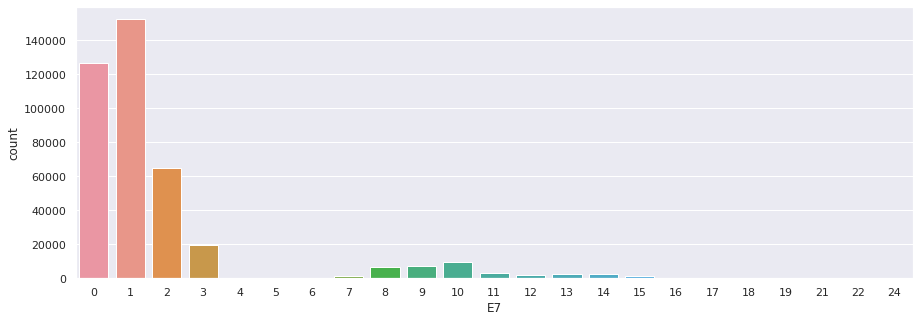

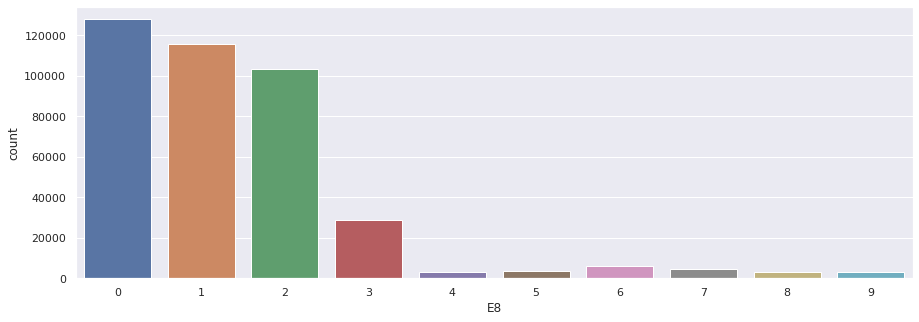

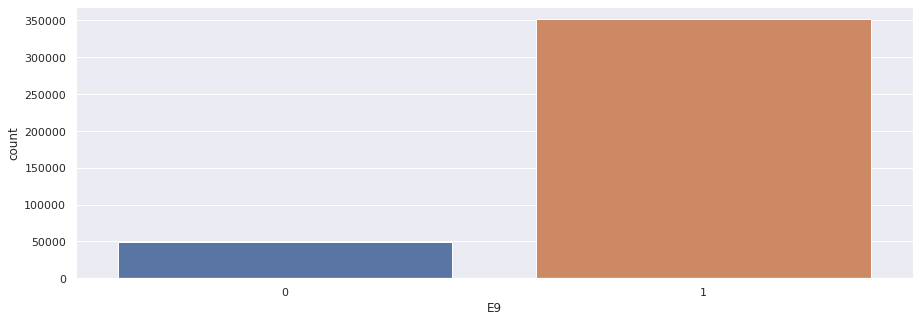

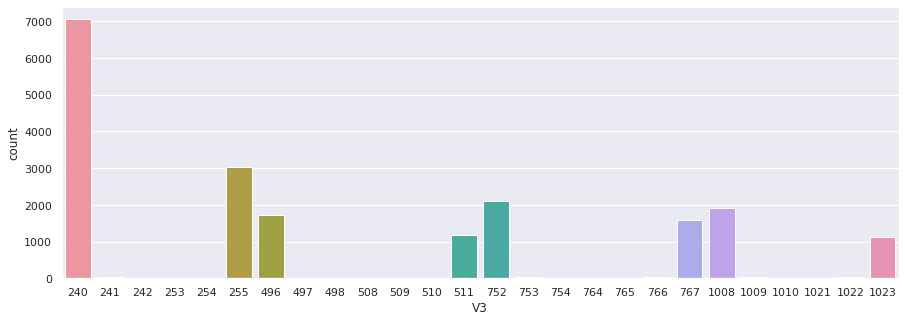

0    399842
Name: V7, dtype: int64

In [ ]:
sns.countplot(x = data["E7"])
plt.show()
sns.countplot(x = data["E8"])
plt.show()
sns.countplot(x = data["E9"])
plt.show()
sns.countplot(x=data["V3"].head(20000))
plt.show()
# Will drop the V7 Feature
data["V7"].value_counts()

# Will drop the V7 Feature

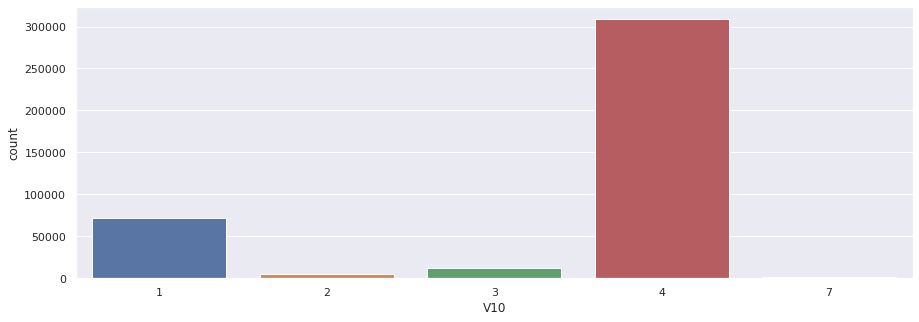

In [ ]:
data = data.drop("V7", axis=1)
sns.countplot(x=data["V10"])
plt.show()

In [ ]:
data["V9"].value_counts()
data = data.drop("V9", axis=1)

Correlation Matrix for all the features that are existing in the dataset after EDA

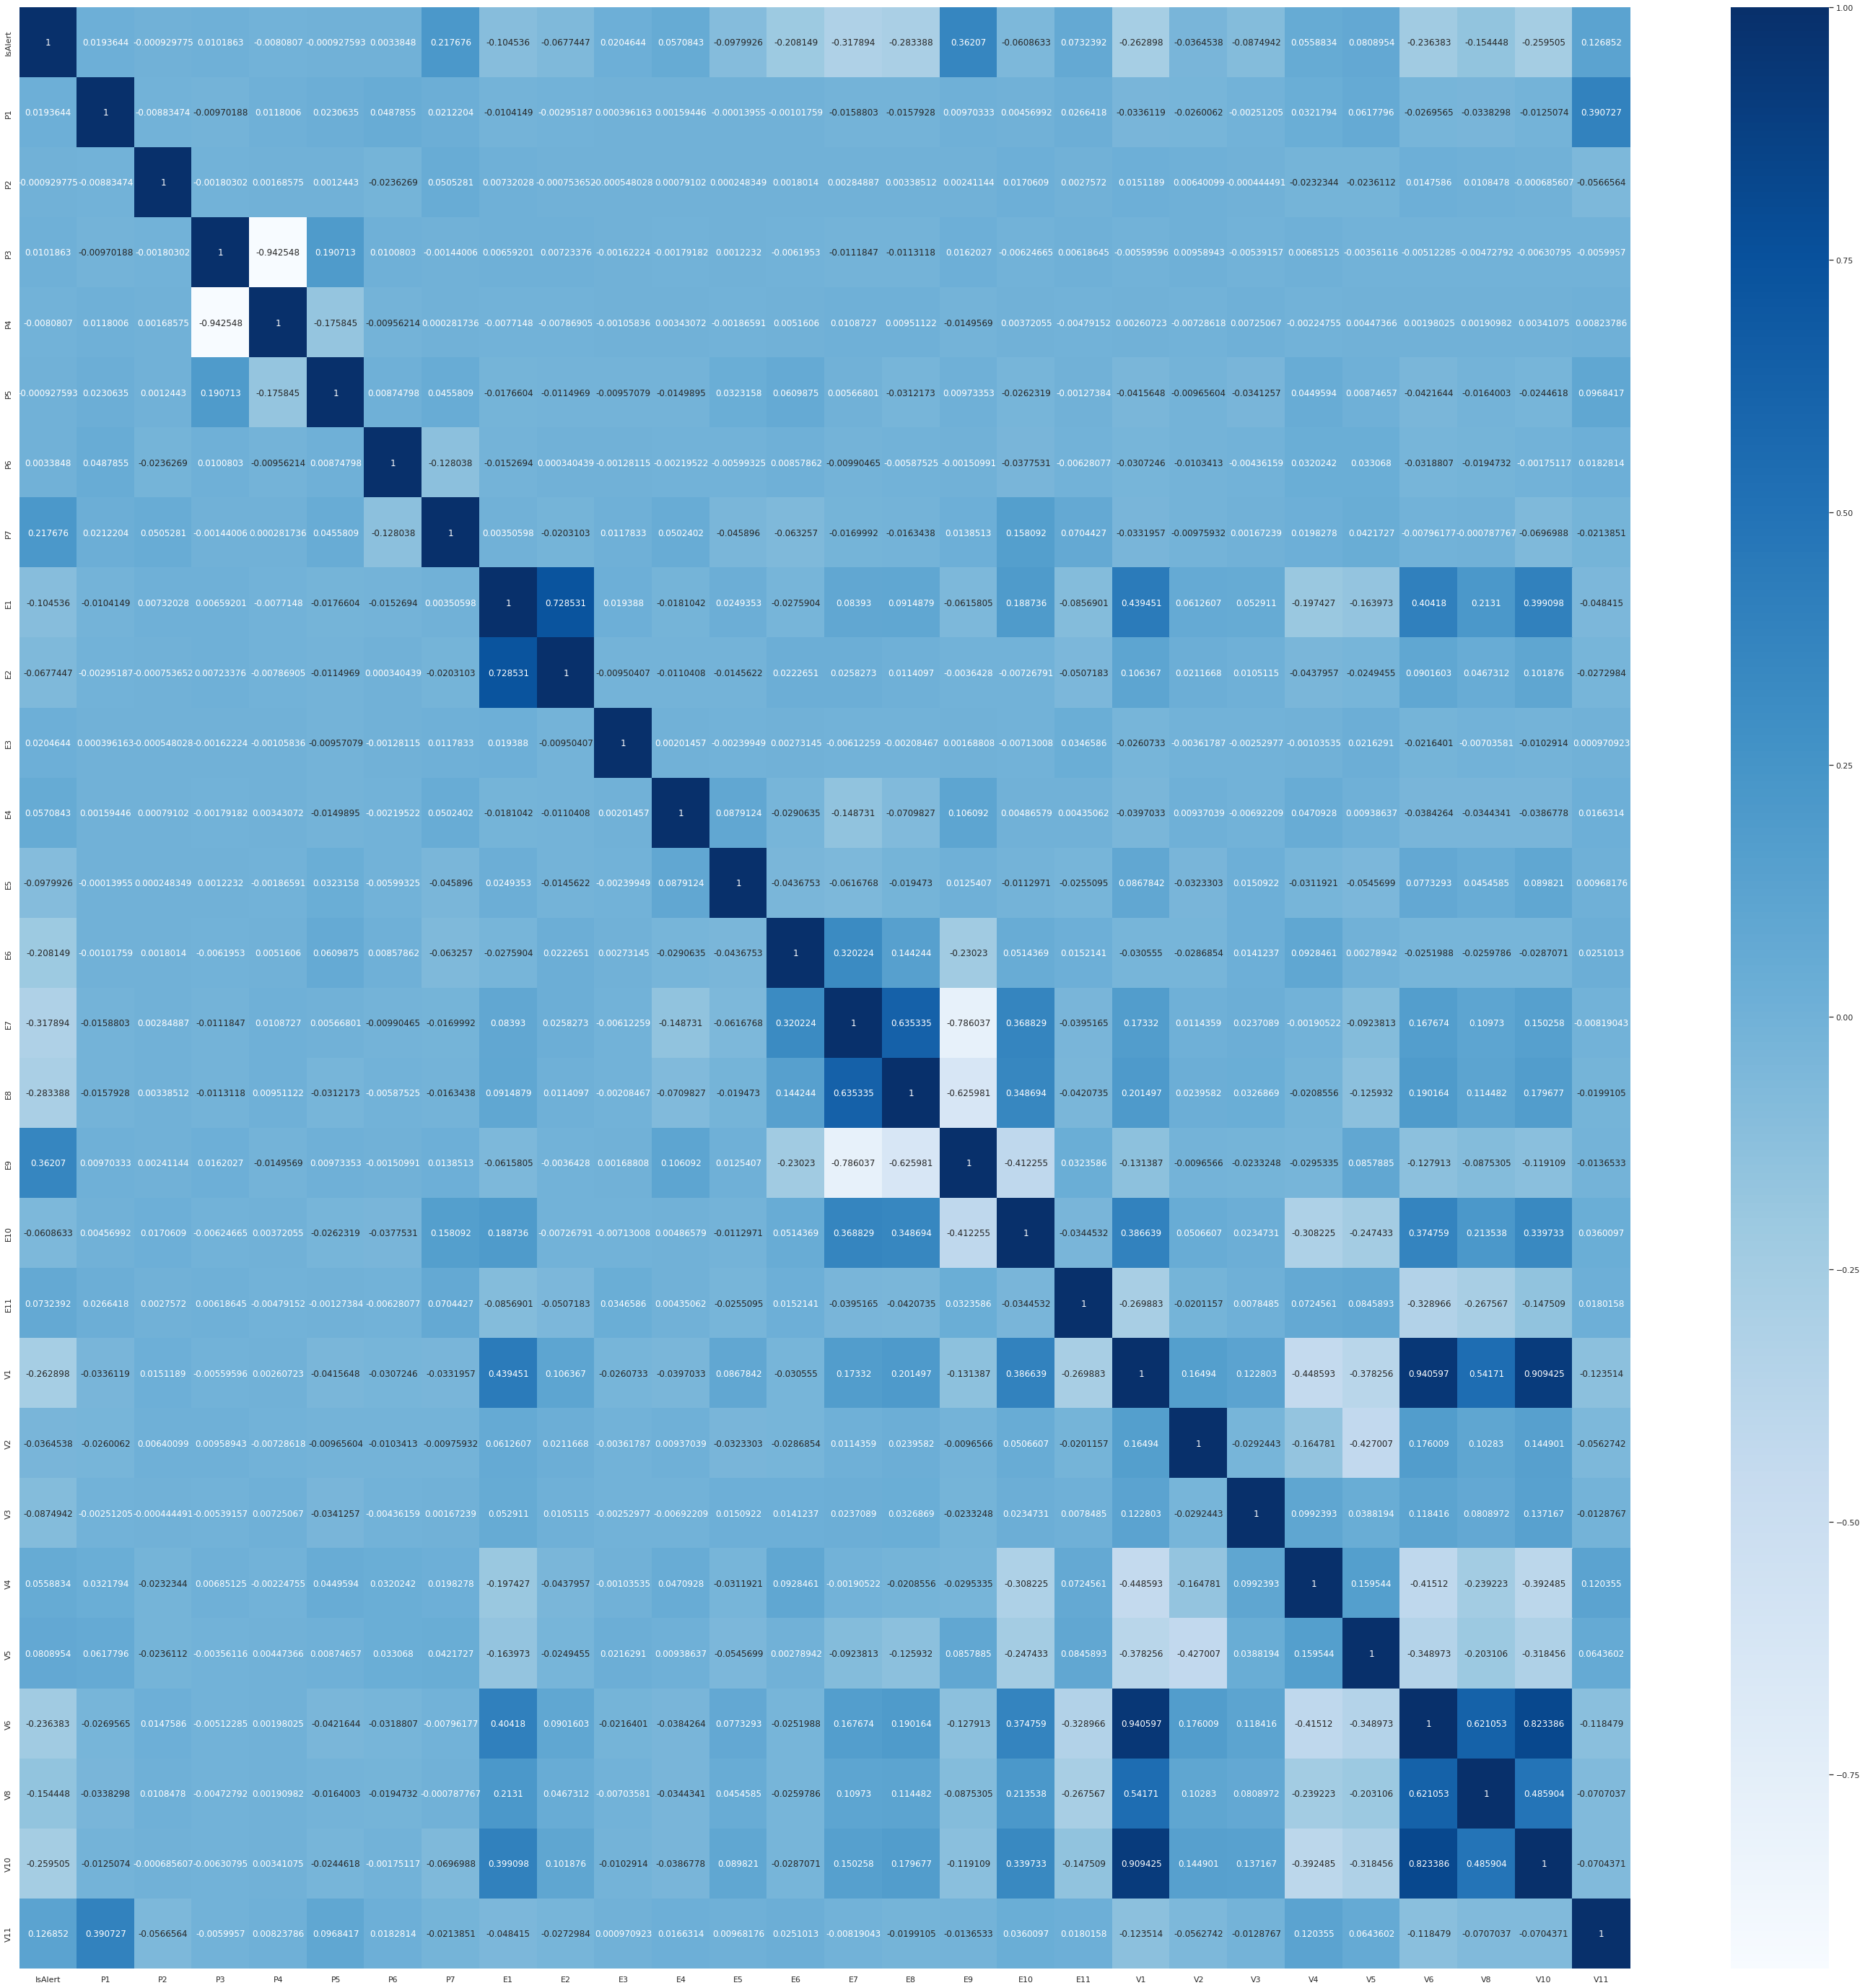

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='g', ax=ax)
plt.show()

#** FEATURE ENGINEERING **

I will be using the StandardScaler to scale the dataset

In [ ]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
y = data["IsAlert"]
cols = list(data.columns)
cols.remove("IsAlert")
X = data[cols]

In [ ]:
naya=scaler.fit_transform(X)
naya

array([[-0.4102853 , -0.25852741, -0.72885682, ...,  1.56632584,
         0.50501114,  0.39641641],
       [-0.4099166 ,  0.72797878, -0.72885682, ...,  1.56632584,
         0.50501114,  0.39673971],
       [-0.40443702, -1.05617902, -0.38320886, ...,  1.63526024,
         0.50501114,  0.39650149],
       ...,
       [-0.4195154 , -0.49477458, -0.72885682, ...,  1.56632584,
         0.50501114,  0.39512319],
       [-0.41453165,  1.6076254 , -0.72885682, ...,  1.56632584,
         0.50501114,  0.39639939],
       [-0.41453165,  1.6076254 , -0.72885682, ...,  1.56632584,
         0.50501114,  0.39639939]])

#Making models
Below are the models that are trained without Hyperparameter tuning:

Logistic Regressor

Decision Tree Classifier



In [ ]:
#making models
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

l=LogisticRegression()
dt=DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(naya, y)

In [ ]:
l.fit(X_train,y_train)

LogisticRegression()

In [ ]:
accuracy_score(y_test, l.predict(X_test))
#accuracy about 76 percent approx

0.7655285561368934

In [ ]:
dt.fit(X_train, y_train)
accuracy_score(y_test, dt.predict(X_test))


0.9872650333630115

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
accuracy_score(y_test, gbc.predict(X_test))

0.8826242234471444

#Hyperparameter Optimization

I will be using the GridSearchCV and RandomizedSearchCV Optimizers available from Scikit-Learn API.

Since the training set's size is huge, therefore, I will be choosing the first 60,000 samples from the training set for developing new models which are hyperparameter optimized.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_param_grid = {
    "fit_intercept": [True, False],
    "max_iter"     : [100, 1000, 10_000],
    "tol"          : [0.0001, 0.001]
}

# Parameter Grid for GradientBoostingClassifier
gb_param_grid = {
    "learning_rate": [0.1, 0.01, 0.001],
    "random_state": [i for i in range(1, 9)]
}

l_hp = LogisticRegression()
gb_hp = GradientBoostingClassifier()

lr_clf = RandomizedSearchCV(l_hp, lr_param_grid)
gb_clf = RandomizedSearchCV(gb_hp, gb_param_grid)

In [ ]:
search_lr = lr_clf.fit(X_train[:60_000], y_train[:60_000])
from sklearn.metrics import accuracy_score
accuracy_score(y_test, search_lr.predict(X_test))

0.7693600504196637

In [ ]:
search_gb = gb_clf.fit(X_train[:1000], y_train[:1000])
accuracy_score(y_test, search_gb.predict(X_test))

0.8418783325496944

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


#**Conclusion**

#  Before Tuning

##Decision trees have an excellent accuracy of 98.6%

#logistic regression 76.3% 

#grandient boost classifier has about 88.2% 

# **After hyperparameter tuning**( Training on first 60,000 data-points)

### logistic regression 76.4%

### gradient boosting 84.7%

# Next steps

The model(s) that I would choose for further process such as deployment for this task are the Decision Tree Classifier and Gradient Boosting Classifier

# References and APIs

Seaborn API

Scikit-Learn API

Stackoverflow



# **Checklist of the project requirements**

Pick a large real-world dataset from Kaggle (see the "Resources" section below) and download it using opendatasets. Your training set should contain at least 50,000 rows and 5 columns of data.  **(My data set has more than the required amount)**

Read the dataset description, understand the problem statement and describe the modeling objective clearly. You can also browse through existing notebooks created by others for inspiration. **(Done)**

Perform exploratory data analysis, gather insights about the data, perform feature engineering, create a training-validation split, and prepare the data for modeling. **(Done)**

Train & evaluate different machine learning models, tune hyperparameters and reduce overfitting to improve the model. **(Trained 3 different models and tuned 2)**

Report the final performance of your best model(s), show sample predictions, and save model weights. Summarize your work, share links to references, and suggest ideas for future work. **(Done)**

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
